# Import libraries

In [47]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import statistics 
from scipy.stats import mode 
import scipy 
from mlxtend.preprocessing import TransactionEncoder 
import seaborn as sns

In [48]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Import data

In [49]:
import scipy.io
dataset = scipy.io.loadmat('sonarData.mat')

In [50]:
hTrue = dataset['hTrue'].tolist()
sonarMeasure = dataset['sonarMeasure'].tolist()
t = dataset['t'].tolist()
vTrue = dataset['vTrue'].tolist()

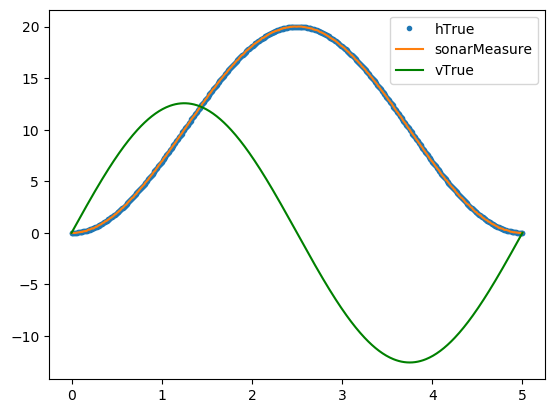

In [51]:
plt.plot( t[0],hTrue[0], '.',label='hTrue')
plt.plot( t[0], sonarMeasure[0], label='sonarMeasure')
plt.plot( t[0],vTrue[0], 'g', label='vTrue',)
plt.legend()
plt.show()

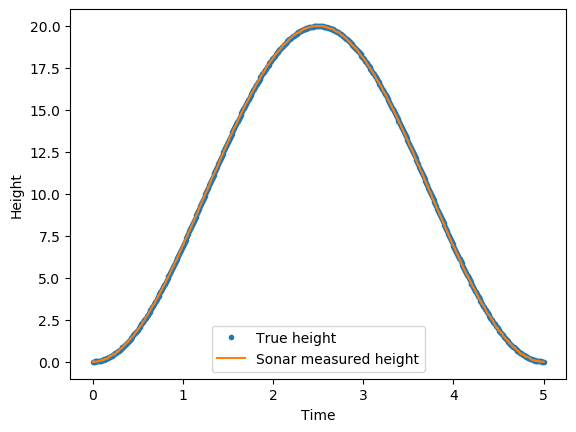

In [52]:
plt.plot( t[0],hTrue[0], '.',label='True height')
plt.plot( t[0], sonarMeasure[0], '-', label='Sonar measured height')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('Data1.png', transparent=True)

plt.show()

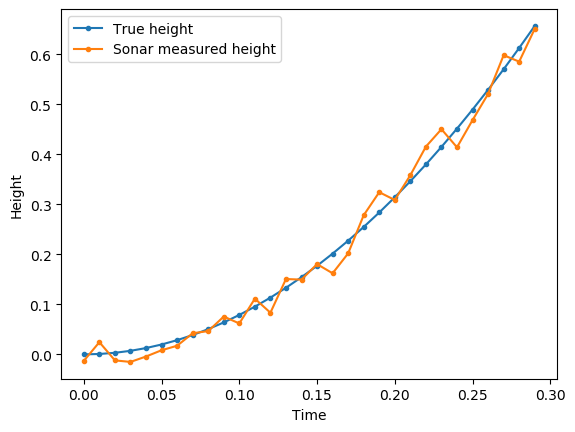

In [53]:
plt.plot( t[0][:30],hTrue[0][:30], '.-',label='True height')
plt.plot( t[0][:30], sonarMeasure[0][:30], '.-', label='Sonar measured height')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('Data2.png', transparent=True)

plt.show()

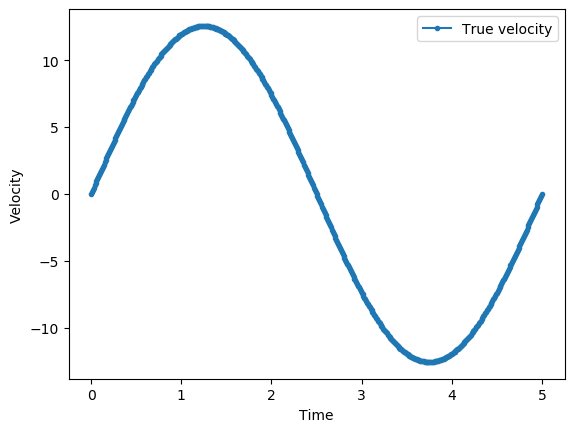

In [54]:
plt.plot( t[0], vTrue[0], '.-', label='True velocity')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Velocity')

plt.savefig('Data3.png', transparent=True)

plt.show()

# Initialise variables

In [55]:
xo = 0   #initial System State guess
po = 10   #initial uncertainty estimate guess

σ = 0.02    #sensor noise
σ2 = σ**2

rn = σ2  #measurement uncertainty

In [56]:
qn = 0.0001  #Chosen error


# Functions

In [57]:
def State_update(xn_1, Kn, zn):

    xnn = xn_1 + Kn * (zn - xn_1)
    
    return xnn    

In [58]:
def State_extrap(xnn): #The first approach where the velocity is assumed to be constant
    
    x = xnn
    
    return x

In [59]:
def Kal_gain(pn_1, rn):
    
    Kn = (pn_1)/(pn_1 + rn)
    
    return Kn

In [60]:
def Cov_update(Kn, pn_1):
    
    pnn = (1 - Kn) * pn_1
    
    return pnn

In [61]:
def Cov_extrap(pnn, qn):
    
    pn = pnn + qn
    
    return pn

In [62]:
State_update(xo, 8, sonarMeasure[0][0])

-0.10384220243059851

In [63]:
sonarMeasure[0][0]

-0.012980275303824814

In [64]:
Estimate = []
Kalman_Gain = []

T = 0.01    #Time step value between measurements
qn = 0.001  #Process noise

for i in range(len(t[0])):
    
    zn = sonarMeasure[0][i]
    
    Kn = Kal_gain(po, rn)
    Kalman_Gain.append(Kn)
        
    x = State_update(xo, Kn, zn)
  
    p = Cov_update(Kn, po)
    
    xo = State_extrap(x)
    po = Cov_extrap(p, qn)
    
    Estimate.append(xo)

In [65]:
Estimate

[-0.012979756113580269,
 0.016103330515961235,
 -0.0054387842205770726,
 -0.012825460094162248,
 -0.006283794819092858,
 0.0048652849195805915,
 0.014336922611827,
 0.03569202907441531,
 0.04400649690425203,
 0.06820541483876037,
 0.06331332994874848,
 0.1001207702911642,
 0.08723914409052894,
 0.1357903961095311,
 0.1462866427277962,
 0.17245142942314304,
 0.16455820939185845,
 0.19315902847943323,
 0.2582899350986494,
 0.30879876804385714,
 0.30869654670796354,
 0.34663809925638805,
 0.39924020225542955,
 0.43829552873907646,
 0.41973562266213826,
 0.45700105880609726,
 0.5057432069962263,
 0.5764772880274478,
 0.5832366061977234,
 0.6350065762566346,
 0.7059327019922086,
 0.7400886782014408,
 0.7910895493342653,
 0.8294095174904912,
 0.894711367773772,
 0.9525825489730131,
 0.9859222125113118,
 1.071364989565445,
 1.1165979458136968,
 1.153172078708945,
 1.2265346282435505,
 1.2731750076324888,
 1.3378569442144754,
 1.4137388806870241,
 1.456173682192094,
 1.5278568677683473,
 1.584

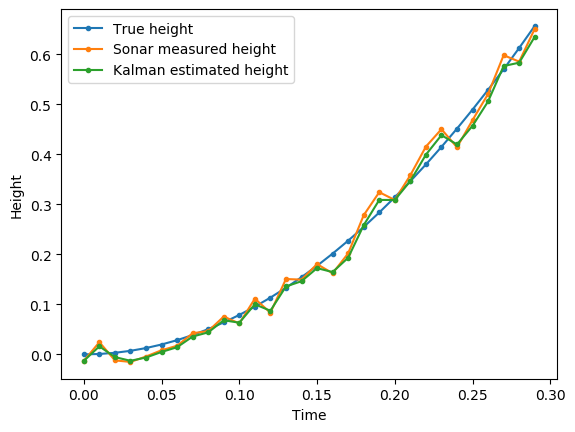

In [67]:
plt.plot( t[0][:30],hTrue[0][:30], '.-',label='True height')
plt.plot( t[0][:30], sonarMeasure[0][:30], '.-', label='Sonar measured height')
plt.plot( t[0][:30],Estimate[:30], '.-', label='Kalman estimated height',)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('approach2.png', transparent=True)
plt.show()

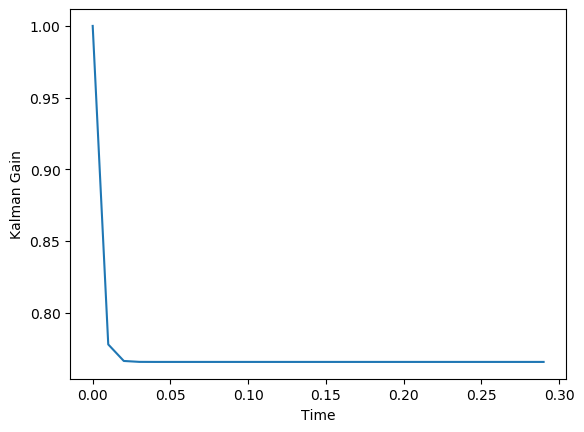

In [68]:
plt.plot(t[0][:30], Kalman_Gain[:30])

plt.xlabel('Time')
plt.ylabel('Kalman Gain')

plt.savefig('KG2.png', transparent=True)

plt.show()

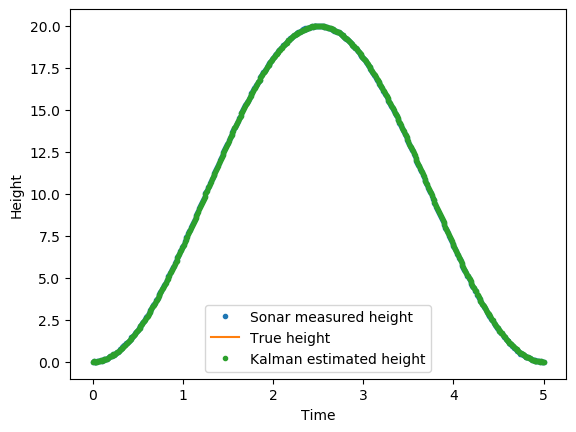

In [69]:
plt.plot( t[0], sonarMeasure[0], '.', label='Sonar measured height')
plt.plot( t[0],hTrue[0], label='True height')
plt.plot( t[0],Estimate, '.', label='Kalman estimated height',)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('approach22.png', transparent=True)

plt.show()

## part 2

In [70]:
error = []

for i in range(len(t[0])):
    
    xp = Estimate[i]           #predicted height value
    xa = hTrue[0][i]           #true height value
    
    e = xa - xp                #estimation error
    e2 = e**2
    
    error.append(e2)

In [71]:
RMS = np.sqrt(sum(error)/len(error))   #root mean squared of the estimation error

In [72]:
RMS

0.03176288221951689

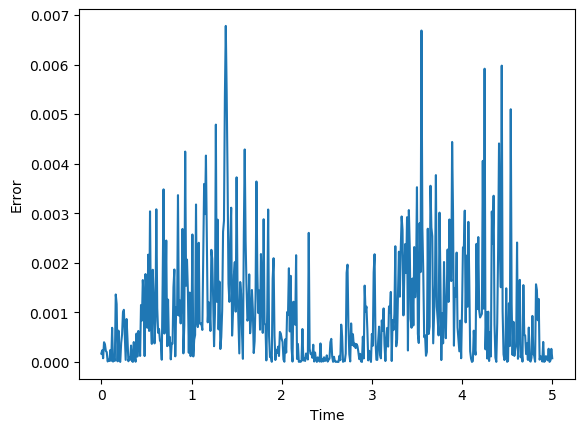

In [73]:
plt.plot( t[0], error, label='Estimation error')

plt.xlabel('Time')
plt.ylabel('Error')

#plt.savefig('approach22.png', transparent=True)

plt.show()

# Question 2

In [27]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Initialise variables

In [28]:
T = 0.01                               #Time step between measurements

xo = [[0],                             #initial System State guess
     [0]]

po = [[75, 0],                         #initial uncertainty estimate guess
      [0, 75]]

F = [[1, T],                           #State transition matrix
    [0, 1]]

H = [[1, 0]]                           #Observation matrix

Qo = [[(T**4)/4, (T**3)/2],            #Process noise matrix
    [(T**3)/2, T**2]]

Q = np.dot(Qo, 4)

rn = [[σ**2]]                          #Measurement uncertainty

I = [[1, 0],                           #Identity matrix
    [0, 1]]

# Functions

In [29]:
def predict(F, xo, po, Q):
    
    x = np.dot(F, xo)
    
    p = np.dot(np.dot(F, po), np.transpose(F)) + Q
    
    return x, p

In [30]:
def gain(po, H, rn):
    
    Kn = np.dot(po, np.transpose(H)) / (np.dot(np.dot(H , po), np.transpose(H)) + rn)
    
    return Kn

In [31]:
def estimate(xo, Kn, zn, H, I, rn, po):
    
    xn = xo + Kn * (zn - np.dot(H, xo))
    
    pn = (I - np.dot(Kn,H))*po*np.transpose(I - np.dot(Kn,H)) + np.dot(np.dot(Kn, rn), np.transpose(Kn))
    
    return xn, pn

In [32]:
Position = []
Velocity = []
Kalman_Gain = []

xo = predict(F, xo, po, Q)[0]
po = predict(F, xo, po, Q)[1]

for i in range(len(vTrue[0])):
    
    zn = sonarMeasure[0][i]
    
    Kn = gain(po, H, rn)
    Kalman_Gain.append(Kn[0].item())
    
    x = estimate(xo, Kn, zn, H, I, rn, po)[0]
    p = estimate(xo, Kn, zn, H, I, rn, po)[1]
        
    xo = predict(F, x, p, Q)[0]
    po = predict(F, x, p, Q)[1]
    
    Position.append(xo[0].item())
    Velocity.append(xo[1].item())

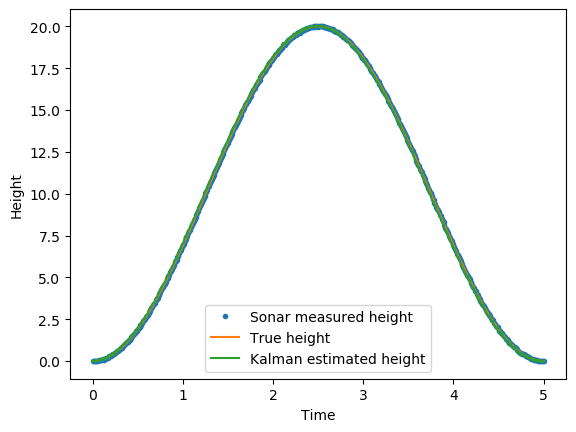

In [33]:
plt.plot( t[0], sonarMeasure[0], '.', label='Sonar measured height')
plt.plot( t[0],hTrue[0], label='True height')
plt.plot( t[0], Position, label='Kalman estimated height')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('Q2 Total height2.png', transparent=True)

plt.show()

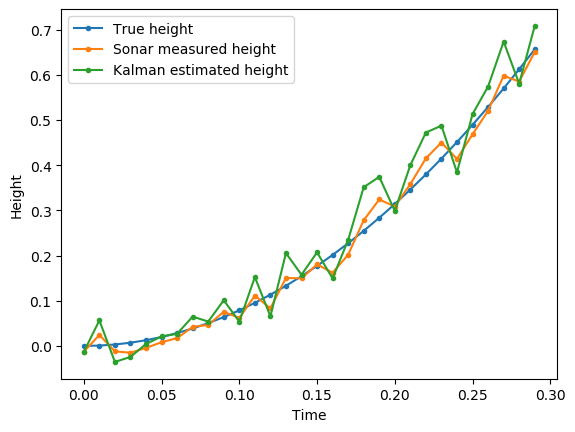

In [34]:
plt.plot( t[0][:30],hTrue[0][:30], '.-',label='True height')
plt.plot( t[0][:30], sonarMeasure[0][:30], '.-', label='Sonar measured height')
plt.plot( t[0][:30],Position[:30], '.-', label='Kalman estimated height',)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('Q2 partial height2.png', transparent=True)
plt.show()

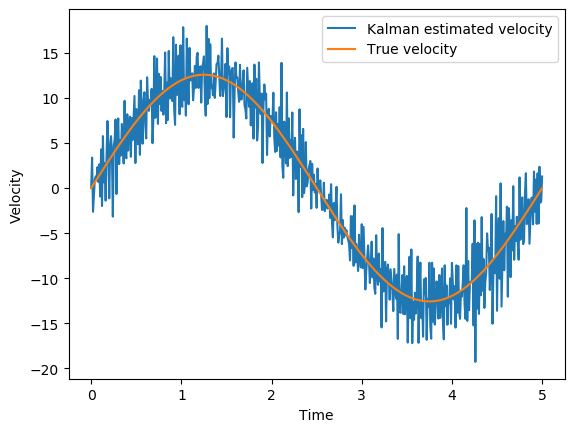

In [35]:
plt.plot( t[0], Velocity, label='Kalman estimated velocity')
plt.plot( t[0],vTrue[0], label='True velocity')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity')

plt.savefig('Q2 velocity2.png', transparent=True)

plt.show()

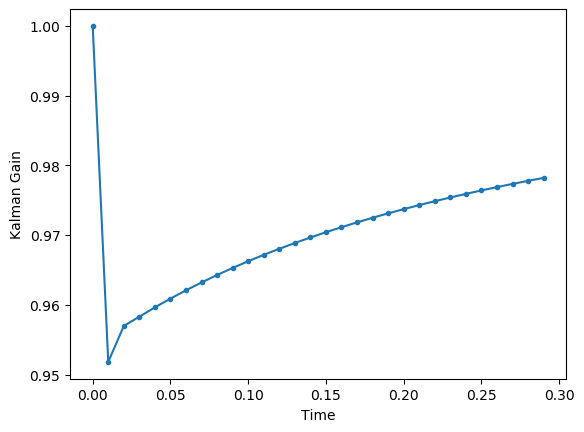

In [36]:
plt.plot(t[0][:30], Kalman_Gain[:30], '.-', label='positon')

plt.xlabel('Time')
plt.ylabel('Kalman Gain')

plt.savefig('Q2 KG2.png', transparent=True)

plt.show()

## part 4

In [37]:
xo = 0                                #initial height
vo = 0                                #initial velocity
ΔT = 0.01                             #The time step or change in time is constant for this problem
Calculation_Position = []
Calculation_Velocity = []

for i in range(len(t[0])):
    
    zn = sonarMeasure[0][i]           #measured height
    
    Δx = zn - xo                      #change in height of previous step
    
    Δv = Δx/ΔT                        #change in velocity
    v = vo + 0.9 * Δv                 #velocity
    Calculation_Velocity.append(v)
    
    x = xo + ΔT * v                   #new calculated height
    Calculation_Position.append(x)
    
    xo = zn                           #re-initialise (new measurement becomes old measurement to get the difference)

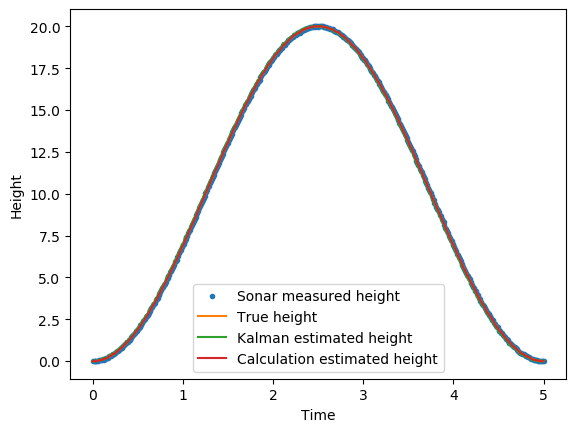

In [38]:
plt.plot( t[0], sonarMeasure[0], '.', label='Sonar measured height')
plt.plot( t[0],hTrue[0], label='True height')
plt.plot( t[0], Position, label='Kalman estimated height')
plt.plot( t[0], Calculation_Position, label='Calculation estimated height')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('part 4 total.png', transparent=True)

plt.show()

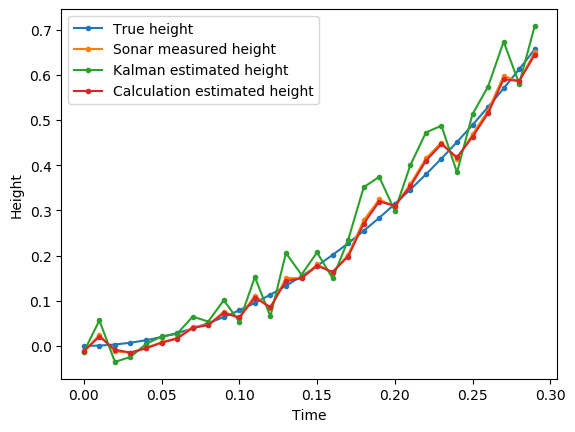

In [39]:
plt.plot( t[0][:30],hTrue[0][:30], '.-',label='True height')
plt.plot( t[0][:30], sonarMeasure[0][:30], '.-', label='Sonar measured height')
plt.plot( t[0][:30],Position[:30], '.-', label='Kalman estimated height',)
plt.plot( t[0][:30], Calculation_Position[:30],'.-', label='Calculation estimated height')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('part 4 partial.png', transparent=True)
plt.show()

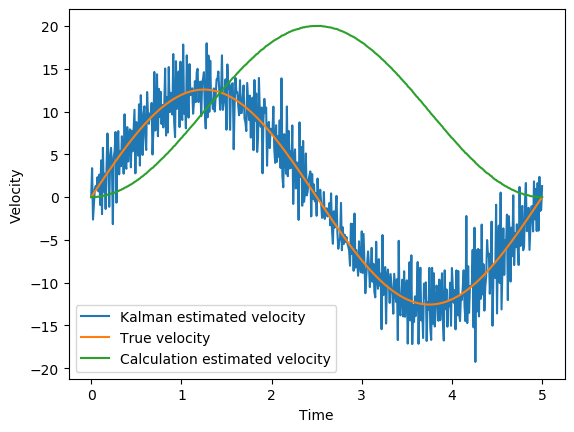

In [40]:
plt.plot( t[0], Velocity, label='Kalman estimated velocity')
plt.plot( t[0],vTrue[0], label='True velocity')
plt.plot( t[0], Calculation_Position, label='Calculation estimated velocity')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Velocity')

plt.savefig('part 4 velocity.png', transparent=True)

plt.show()

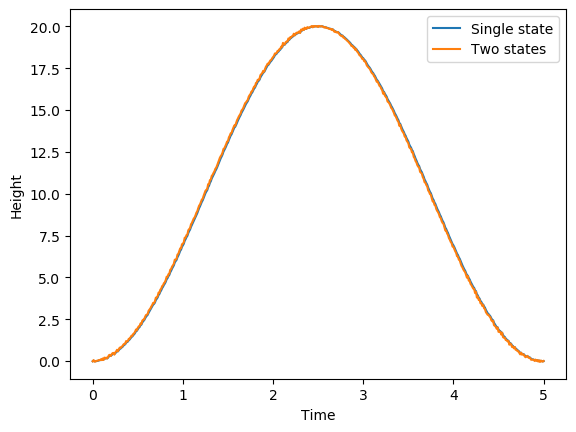

In [41]:
plt.plot( t[0],Estimate, label='Single state',)
plt.plot( t[0], Position, label='Two states')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('states1.png', transparent=True)

plt.show()

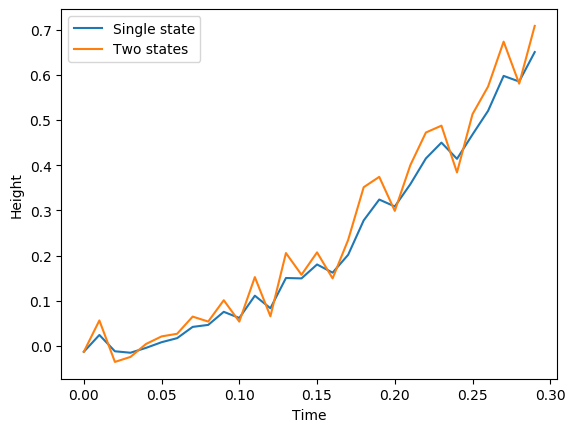

In [42]:
plt.plot( t[0][:30],Estimate[:30], label='Single state',)
plt.plot( t[0][:30], Position[:30], label='Two states')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Height')

plt.savefig('states2.png', transparent=True)

plt.show()